In [598]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl

In [599]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [600]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['/Users/kimhoyoung/python/fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)

Nanum Pen


In [601]:
# Set font family globally
mpl.rcParams['font.family'] = 'Nanum Pen'
mpl.rcParams['axes.unicode_minus']=False
print(mpl.rcParams['font.family'])

['Nanum Pen']


In [602]:
# matplotlib에서 적용할 수 있는 style 목록 조회
print(plt.style.available)
# style의 적용
plt.style.use('Solarize_Light2')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [603]:
survey_raw_df = pd.read_csv('/Users/kimhoyoung/python/data/survey_results_public.csv' , index_col = 'ResponseId')

In [604]:
schema_raw = pd.read_csv('/Users/kimhoyoung/python/data/survey_results_schema.csv' , index_col = 'qname')['question']

In [605]:
schema_raw['CompTotal']

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [606]:
schema_raw['CompFreq']

'Is that compensation weekly, monthly, or yearly?'

In [607]:
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   CodingActivities                58899 non-null  object 
 4   EdLevel                         71571 non-null  object 
 5   LearnCode                       71580 non-null  object 
 6   LearnCodeOnline                 50685 non-null  object 
 7   LearnCodeCoursesCert            29389 non-null  object 
 8   YearsCode                       71331 non-null  object 
 9   YearsCodePro                    51833 non-null  object 
 10  DevType                         61302 non-null  object 
 11  OrgSize                         51039 non-null  object 
 12  PurchaseInfluence               

In [608]:
# 표현되는 column과 row의 범위를 변경합니다.
pd.set_option('display.max_columns', 78)
pd.set_option('display.max_rows', 78)

In [609]:
selected_columns = [
    # 인구 통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    # 프로그래밍 경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    # 고용 관련 정보
    'Employment',
    'DevType',
    'WorkExp',
]


In [610]:
survey_df = survey_raw_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canada,NaN,NaN,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time",NaN,NaN
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
4,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, full-stack",NaN
5,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,5,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Udemy,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time","Developer, back-end",5.0
73265,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,5,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Coursera;Udemy;Udacity,None of these,Not sure/can't remember,"Employed, full-time",Data scientist or machine learning specialist,6.0
73266,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42,33,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Udemy;Codecademy;Pluralsight;edX,None of these,Yes,"Employed, full-time","Developer, full-stack;Developer, desktop or en...",42.0


In [25]:
print(schema_raw['YearsCode'])

Including any education, how many years have you been coding in total?


In [29]:
def count_nan(column):
    return len(column)-column.count()

In [611]:
count_nan(survey_df['EdLevel'])

1697

In [67]:
survey_df['YearsCode'].replace('Less than 1 year' , 0, inplace= True)

In [48]:
survey_df['YearsCode'].replace('More than 50 years' , 51, inplace= True)

In [69]:
survey_df['YearsCode']= survey_df['YearsCode'].astype('float')

In [70]:
survey_df['YearsCode']

ResponseId
1         NaN
2         NaN
3        14.0
4        20.0
5         8.0
         ... 
73264     8.0
73265     6.0
73266    42.0
73267    50.0
73268    16.0
Name: YearsCode, Length: 73268, dtype: float64

In [73]:
print(schema_raw['YearsCodePro'])

NOT including education, how many years have you coded professionally (as a part of your work)?


In [74]:
count_nan(survey_df['YearsCodePro'])

21435

In [76]:
survey_df['YearsCodePro'].value_counts()

3                     4261
5                     4057
2                     3945
4                     3884
10                    3333
6                     3184
7                     2760
8                     2646
1                     2644
Less than 1 year      1972
15                    1822
12                    1711
9                     1583
20                    1472
11                    1369
14                    1048
22                     933
16                     921
13                     914
25                     877
18                     787
17                     723
30                     568
23                     463
24                     454
21                     429
19                     380
26                     320
27                     286
35                     266
28                     254
32                     223
40                     175
29                     126
33                     122
31                     121
34                     113
3

In [77]:
survey_df['YearsCodePro'].replace('Less than 1 year' , 0, inplace= True)

In [78]:
survey_df['YearsCodePro'].replace('More than 50 years' , 51, inplace= True)

In [79]:
survey_df['YearsCodePro'] = survey_df['YearsCodePro'].astype(float)

In [80]:
survey_df['YearsCodePro']

ResponseId
1         NaN
2         NaN
3         5.0
4        17.0
5         3.0
         ... 
73264     5.0
73265     5.0
73266    33.0
73267    31.0
73268     5.0
Name: YearsCodePro, Length: 73268, dtype: float64

In [82]:
# survey_df.describe()를 통해 값의 분포를 확인합니다. 
survey_df.describe()

,YearsCode,YearsCodePro,WorkExp
count,71331.000000,51833.000000,36769.000000
mean,12.251307,9.910270,10.242378
std,9.952419,8.712048,8.706850
min,0.000000,0.000000,0.000000
25%,5.000000,4.000000,4.000000
50%,9.000000,7.000000,8.000000
75%,16.000000,14.000000,15.000000
max,51.000000,51.000000,50.000000


In [86]:
# 숫자가 아닌것은 다 nan 처리 하는 방법
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [87]:
schema_raw['Gender']

'Which of the following describe you, if any? Please check all that apply.'

In [89]:
survey_df['Gender'].value_counts()

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

In [95]:
# np.nan 값이 섞인 Series 자료형에 대해 특정 문자 값이 포함되었는지 사용할 수 있는 메서드로 contains()가 있습니다. 
# 첫 인자로 포함된 것을 찾을 문자열을 넣어줍니다. na키워드 인수를 활용하면 NaN값을 대신할 값을 넣을 수 있습니다.

In [612]:
# '~'은 비트 연산자로 Series 자료형의 벡터화 연산을 위해 True를 False로 False를 True로 반전해주는 역할을 합니다.
survey_df.where(~(survey_df['Gender'].str.contains(';',na=False)),np.nan, inplace = True)

In [613]:
survey_df['Gender'].value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

In [107]:
%matplotlib inline

sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14 
mpl.rcParams['figure.figsize'] = (9,5)
mpl.rcParams['figure.facecolor'] = '#00000000'

In [115]:
schema_raw['Country']

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [122]:
# nunique() : 유일한 값의 개수를 확인합니다. NaN 값은 count에 포함하지 않습니다.
survey_df['Country'].nunique()

180

In [124]:
survey_raw_df['Country'].value_counts().head(15)

United States of America                                13543
India                                                    6639
Germany                                                  5395
United Kingdom of Great Britain and Northern Ireland     4190
Canada                                                   2490
France                                                   2328
Brazil                                                   2109
Poland                                                   1732
Netherlands                                              1555
Spain                                                    1521
Italy                                                    1514
Australia                                                1462
Russian Federation                                       1229
Turkey                                                   1020
Sweden                                                   1020
Name: Country, dtype: int64

In [127]:
survey_raw_df['Country'].value_counts().head(15).index

Index(['United States of America', 'India', 'Germany',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada',
       'France', 'Brazil', 'Poland', 'Netherlands', 'Spain', 'Italy',
       'Australia', 'Russian Federation', 'Turkey', 'Sweden'],
      dtype='object')

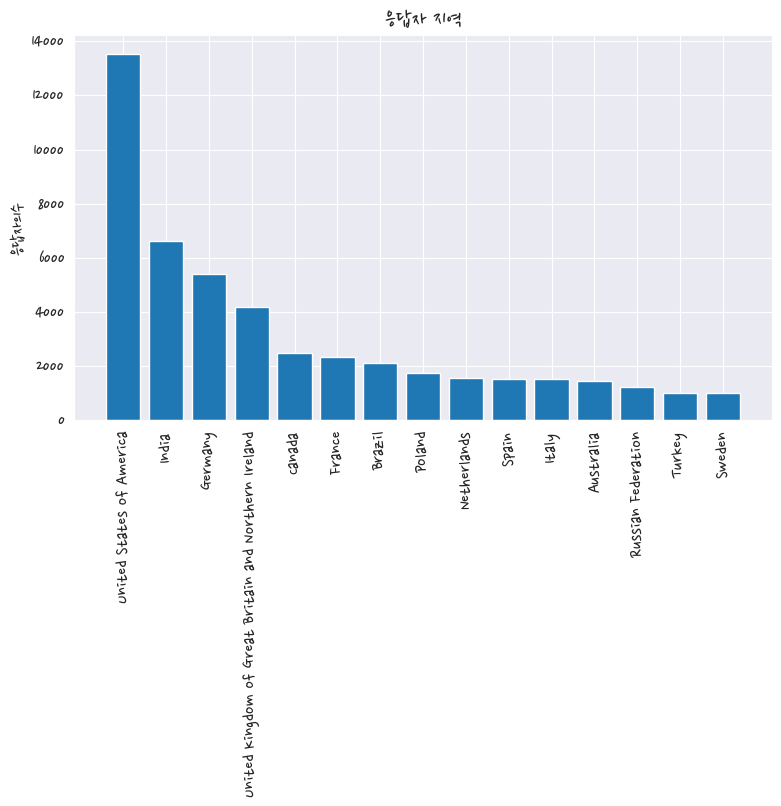

In [174]:
plt.title('응답자 지역')
country_name = survey_raw_df['Country'].value_counts().head(15).index
top_country = survey_raw_df['Country'].value_counts().head(15)
plt.bar(country_name,top_country)
plt.xticks(rotation=90)
plt.ylabel('응답자의수')
plt.show()

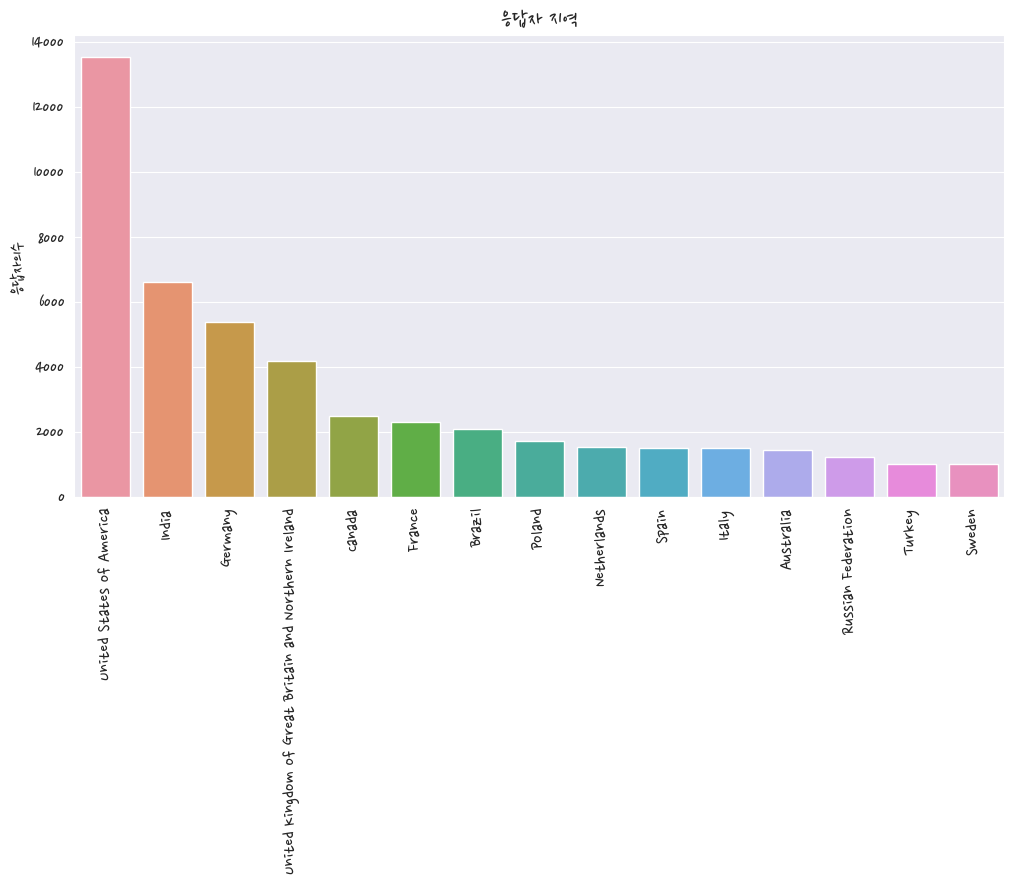

In [168]:
country_name = survey_raw_df['Country'].value_counts().head(15).index
top_country = survey_raw_df['Country'].value_counts().head(15)
fig = plt.figure(figsize=(12,6))
plt.title('응답자 지역')
sns.barplot(x=country_name, y=top_country)
plt.xticks(rotation=90)
plt.ylabel('응답자의수')
plt.show()

In [175]:
schema_raw['Age']

'What is your age?'

In [179]:
count_nan(survey_df['Age'])

3011

In [181]:
age_counts = survey_df['Age'].value_counts()
age_counts

25-34 years old       27878
18-24 years old       16455
35-44 years old       13866
45-54 years old        5250
Under 18 years old     3775
55-64 years old        1974
65 years or older       547
Prefer not to say       512
Name: Age, dtype: int64

In [182]:
survey_df['Age'].nunique()

8

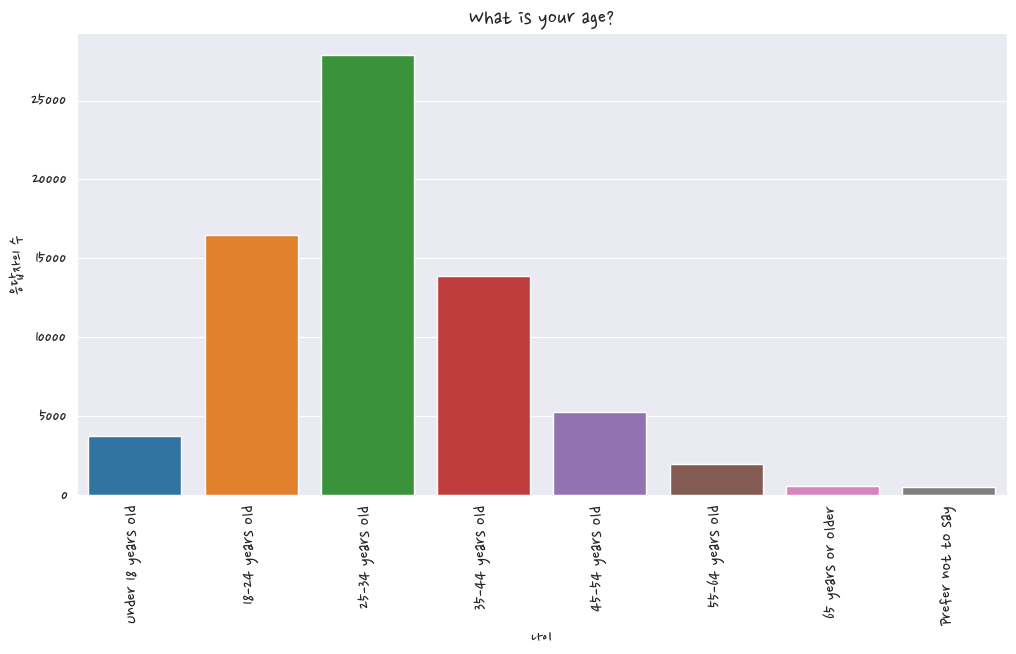

In [195]:
order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old' ,
         '45-54 years old', '55-64 years old' , '65 years or older', 'Prefer not to say']
fig = plt.figure(figsize=(12,6))
sns.barplot(x=survey_df['Age'].value_counts().index, y=survey_df['Age'].value_counts(), order=order)
plt.title(schema_raw['Age'])
plt.xticks(rotation=90)
plt.xlabel('나이')
plt.ylabel('응답자의 수')
plt.show()

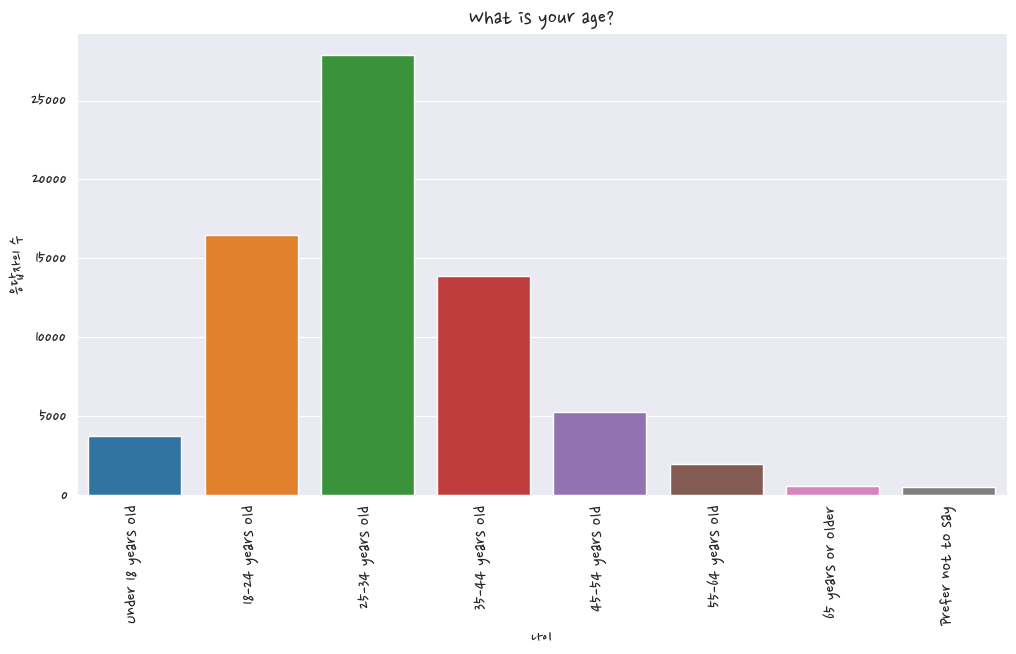

In [196]:
fig = plt.figure(figsize=(12,6))
sns.countplot(data = survey_df, x='Age' , order=order)
plt.title(schema_raw['Age'])
plt.xticks(rotation=90)
plt.xlabel('나이')
plt.ylabel('응답자의 수')
plt.show()

In [197]:
schema_raw.Gender

'Which of the following describe you, if any? Please check all that apply.'

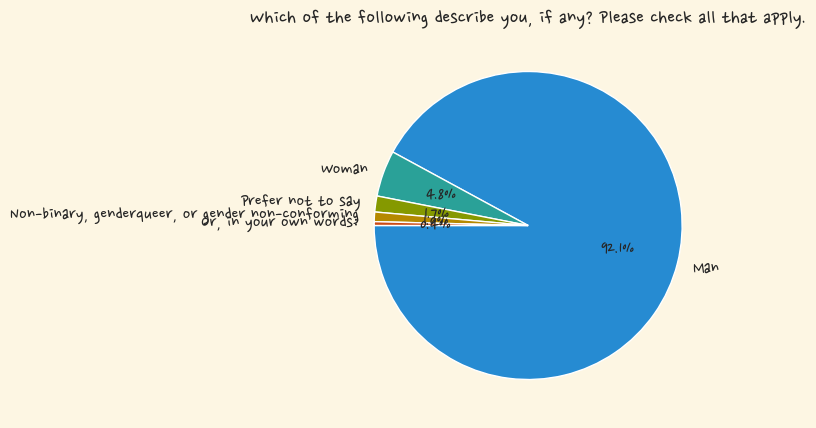

In [614]:
survey_df.where(~(survey_df['Gender'].str.contains(';',na=False)),np.nan, inplace = True)
plt.title(schema_raw.Gender)
sizes = survey_df['Gender'].value_counts()
plt.pie(sizes, labels = survey_df['Gender'].value_counts().index, autopct='%1.1f%%', startangle= 180)
plt.show()

In [226]:
schema_raw['EdLevel']

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [227]:
survey_df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          30050
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15394
Some college/university study without earning a degree                                 9194
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7769
Associate degree (A.A., A.S., etc.)                                                    2221
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2152
Primary/elementary school                                                              1767
Something else                                                                         1222
Professional degree (JD, MD, etc.)                                                     1110
Name: EdLevel, dtype: int64

In [259]:
(survey_df["EdLevel"].value_counts()/survey_df["EdLevel"].value_counts().sum())*100

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          42.396196
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       21.718704
Some college/university study without earning a degree                                12.971402
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    10.960933
Associate degree (A.A., A.S., etc.)                                                    3.133509
Other doctoral degree (Ph.D., Ed.D., etc.)                                             3.036160
Primary/elementary school                                                              2.492981
Something else                                                                         1.724065
Professional degree (JD, MD, etc.)                                                     1.566049
Name: EdLevel, dtype: float64

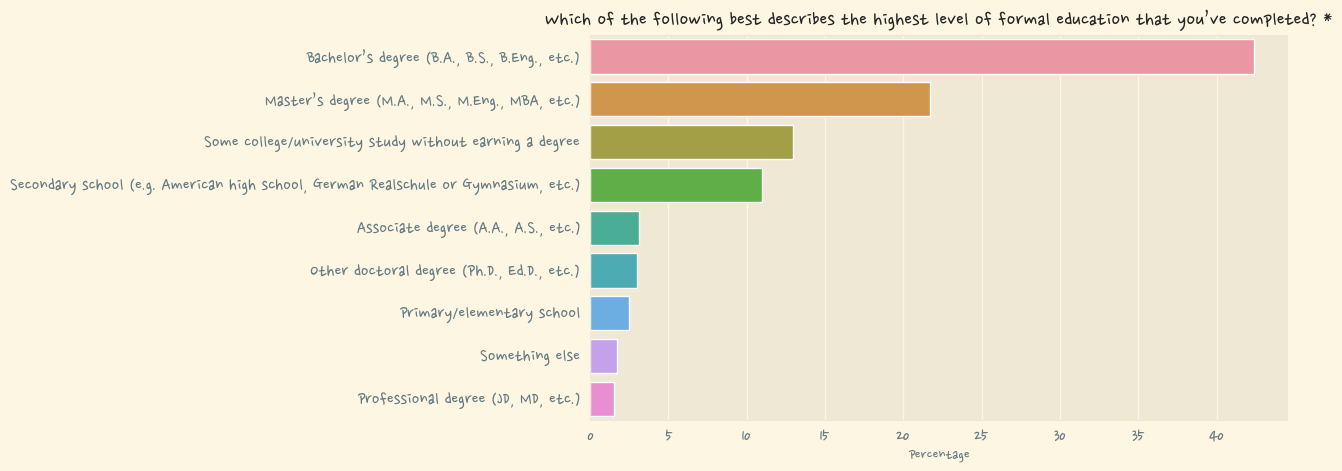

In [642]:
plt.title(schema_raw['EdLevel'])
sns.barplot(x=(survey_df["EdLevel"].value_counts()/survey_df["EdLevel"].value_counts().sum())*100, y=survey_df["EdLevel"].value_counts().index)
plt.xlabel('Percentage')
plt.show()

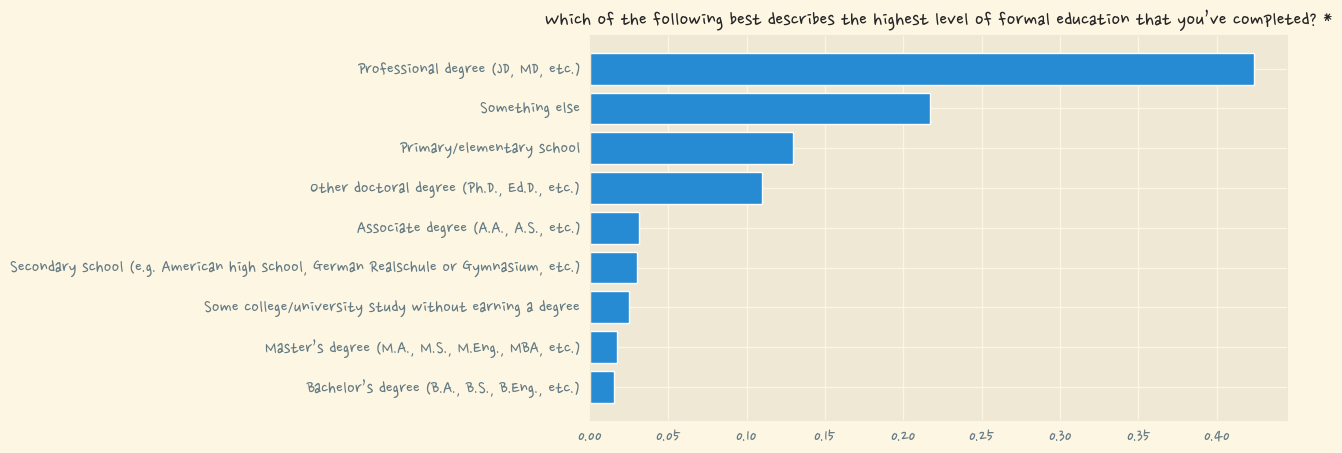

In [286]:
plt.title(schema_raw['EdLevel'])
plt.barh(survey_df['EdLevel'].value_counts().index, 
         survey_df['EdLevel'].value_counts(ascending=True)/survey_df['EdLevel'].value_counts(ascending=True).sum())
plt.show()

In [288]:
survey_df['EdLevel'].value_counts(normalize=True, ascending=True)*100

Professional degree (JD, MD, etc.)                                                     1.566049
Something else                                                                         1.724065
Primary/elementary school                                                              2.492981
Other doctoral degree (Ph.D., Ed.D., etc.)                                             3.036160
Associate degree (A.A., A.S., etc.)                                                    3.133509
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    10.960933
Some college/university study without earning a degree                                12.971402
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       21.718704
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          42.396196
Name: EdLevel, dtype: float64

In [326]:
schema_raw['Employment']

'Which of the following best describes your current employment status?'

In [342]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                  7091
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                                    5274
Developer, front-end                                                                                                                            

# 연습문제 5  
### 즉 DevType column을 제일 작은 단위의 응답 항목으로 나누어 DataFrame 형태로 만들어 보도록 하겠습니다.
- Series를 인자로 받아옵니다.
- value의 구분자는 ';'입니다.
- Series는 items() 메서드를 사용하여 루프할 수 있습니다.
- 반환 값으로 각 제일 작은 단위의 응답 항목을 column으로 갖는 DataFrame을 줍니다.
- 응답자가 제일 작은 단위의 기술 스텍을 선택한 경우 해당 열의 값을 True로 아닌 경우 False로 합니다.
- NaN값은 False로 바꾼다.  

In [615]:
def split_multicolumn(col_series):
    # 반환할 DataFrame이자 최초의 col_series도 담는다.
    result_df = pd.DataFrame(col_series.values, index=col_series.index, columns=["DevType"])
    # result_df = col_series.to_frame() --> 위의 코드와 같다.
    # 기술 스텍 목록을 담았다가 마지막 반환할 때 인덱싱으로 활용
    options = []
    # NaN 값을 갖는 row를 제외하고 반복
    for idx, value  in col_series[col_series.notnull()].items():
        # value를 가져와 ';'를 기준으로 분리하여 각 기술 스텍 문자열 리스트를 만든다.
        for option in value.split(';'):
            # 현재 option이 result_df.columns에 없으면 추가한다.
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
            # 파싱한 기술 스텍에 해당하는 column의 값에 True를 넣는다.
            result_df.at[idx, option] = True
            # result_df.loc[idx, option] = True
    return result_df[options]
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html

In [616]:
def split_multicolumn(Series):
    df = pd.DataFrame(False, columns = (Series.dropna().str.split(';').str[0].unique()), index = Series.index)
    # for idx, rep in Series[Series.notnull()].str.split(';').items:
    #     for one in rep:
    #         df.at[idx, one.strip()] = True
    for idx, rep in Series.str.split(';').items():
        # NaN이 아닌 값을 분기
        if isinstance(rep, list):
            for one in rep:
                df.at[idx, one.strip()] = True
        else :
            pass
    return df
split_multicolumn(survey_df['DevType'])

,Data scientist or machine learning specialist,"Developer, full-stack","Developer, front-end","Developer, back-end","Developer, desktop or enterprise applications",Engineering manager,"Engineer, data",Student,Other (please specify):,"Engineer, site reliability","Developer, mobile",Marketing or sales professional,"Developer, embedded applications or devices",DevOps specialist,Designer,Database administrator,System administrator,"Developer, QA or test",Product manager,Project manager,Data or business analyst,"Senior Executive (C-Suite, VP, etc.)",Security professional,Educator,Academic researcher,"Developer, game or graphics",Cloud infrastructure engineer,Scientist,Blockchain
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [617]:
df = split_multicolumn(survey_df['DevType'])
df

,Data scientist or machine learning specialist,"Developer, full-stack","Developer, front-end","Developer, back-end","Developer, desktop or enterprise applications",Engineering manager,"Engineer, data",Student,Other (please specify):,"Engineer, site reliability","Developer, mobile",Marketing or sales professional,"Developer, embedded applications or devices",DevOps specialist,Designer,Database administrator,System administrator,"Developer, QA or test",Product manager,Project manager,Data or business analyst,"Senior Executive (C-Suite, VP, etc.)",Security professional,Educator,Academic researcher,"Developer, game or graphics",Cloud infrastructure engineer,Scientist,Blockchain
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [653]:
df_DevType = split_multicolumn(survey_df['DevType'])
df_DevType
# np.sum(df)
# split_multicolumn(survey_df['DevType']).sort
# a = np.sum(split_multicolumn(survey_df['DevType']))
devtype_totals = df_DevType.sum().sort_values(ascending=False)
devtype_totals
# np.sum(df).sort()

Developer, full-stack                            28433
Developer, back-end                              26369
Developer, front-end                             15739
Developer, desktop or enterprise applications     9451
Developer, mobile                                 7566
DevOps specialist                                 6093
Student                                           5503
Cloud infrastructure engineer                     5215
Database administrator                            4872
System administrator                              4828
Developer, embedded applications or devices       3871
Project manager                                   3844
Designer                                          3712
Engineer, data                                    3558
Engineering manager                               3534
Data scientist or machine learning specialist     3377
Data or business analyst                          3166
Developer, QA or test                             3045
Academic r

In [648]:
devtype_percentage = (devtype_totals / devtype_totals.sum())* 100
devtype_percentage

Developer, full-stack                            17.462842
Developer, back-end                              16.195185
Developer, front-end                              9.666503
Developer, desktop or enterprise applications     5.804569
Developer, mobile                                 4.646849
DevOps specialist                                 3.742169
Student                                           3.379806
Cloud infrastructure engineer                     3.202923
Database administrator                            2.992261
System administrator                              2.965238
Developer, embedded applications or devices       2.377472
Project manager                                   2.360889
Designer                                          2.279818
Engineer, data                                    2.185235
Engineering manager                               2.170495
Data scientist or machine learning specialist     2.074070
Data or business analyst                          1.9444

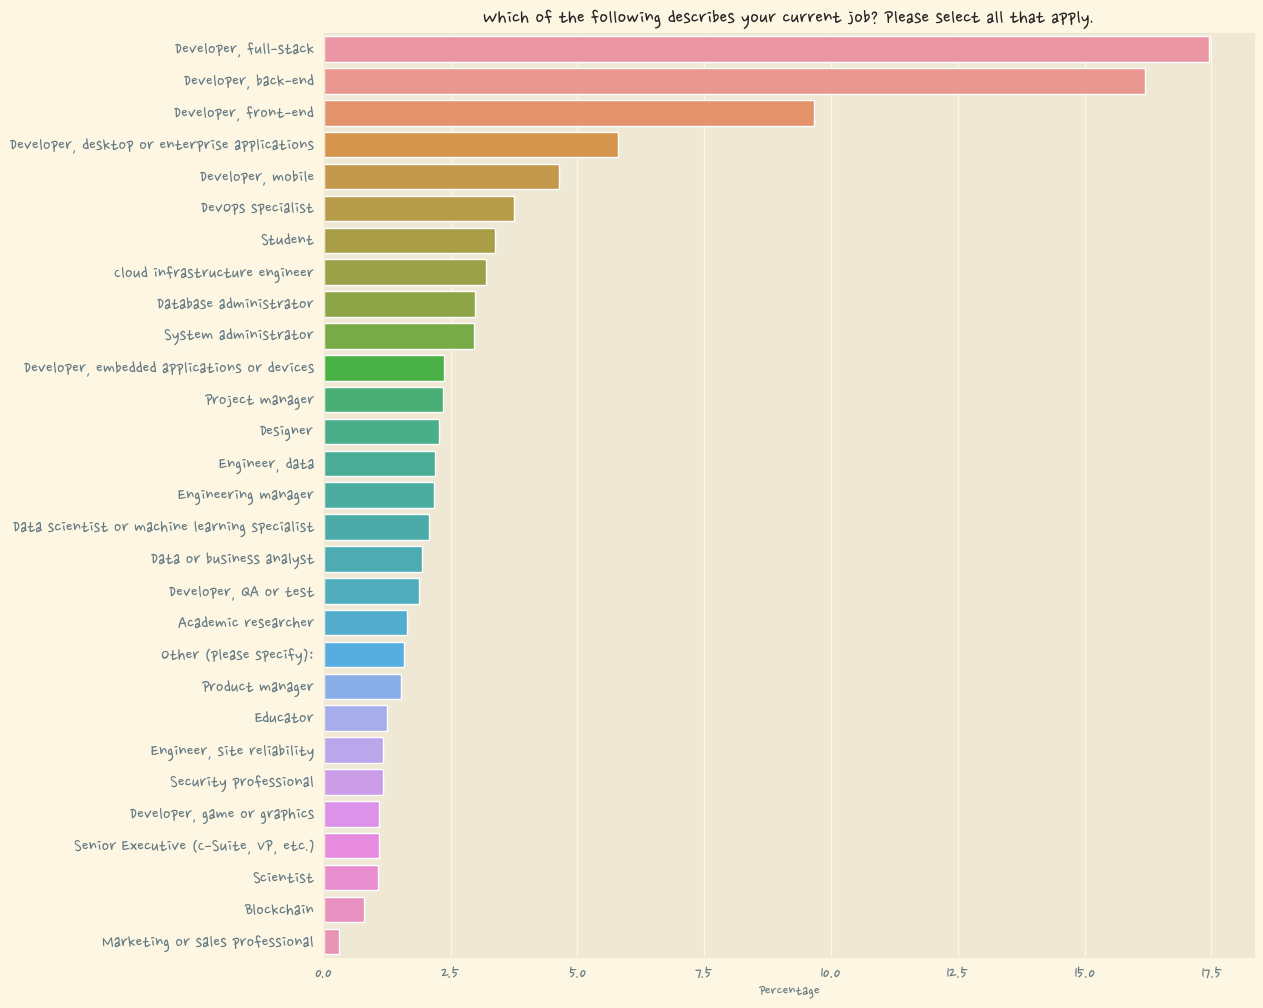

In [644]:
plt.figure(figsize=(12, 12))
plt.title(schema_raw["DevType"])
sns.barplot(x = devtype_percentage , y = devtype_percentage.index )
plt.xlabel("Percentage")
plt.ylabel(None)
plt.show()

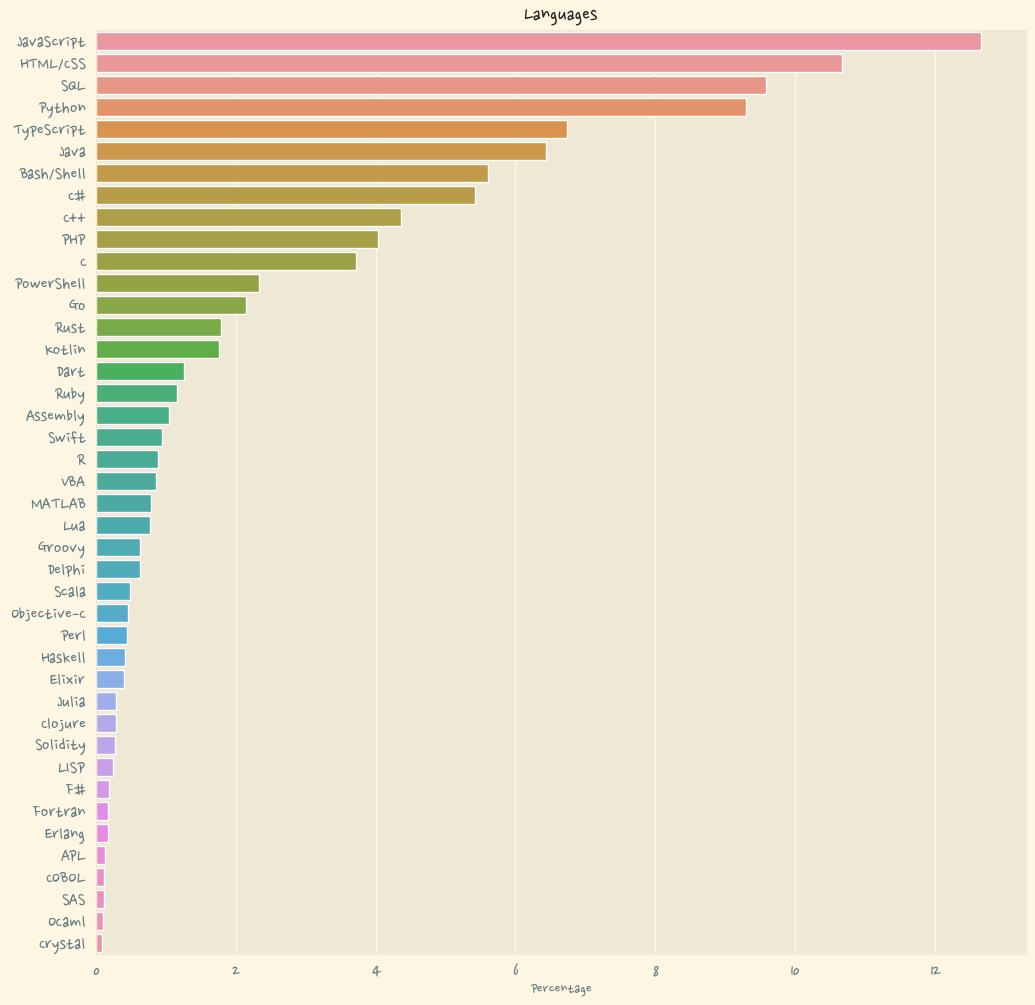

In [662]:
df_LanguageHaveWorkedWith = split_multicolumn(survey_df['LanguageHaveWorkedWith'])
LanguageHaveWorkedWith_totals = df_LanguageHaveWorkedWith.sum().sort_values(ascending=False)
LanguageHaveWorkedWith_percentage = (LanguageHaveWorkedWith_totals/LanguageHaveWorkedWith_totals.sum())*100

plt.figure(figsize=(12, 12))
plt.title('Languages')
sns.barplot(x = LanguageHaveWorkedWith_percentage , y = LanguageHaveWorkedWith_percentage.index )
plt.xlabel('Percentage')
plt.ylabel(None)
plt.show()

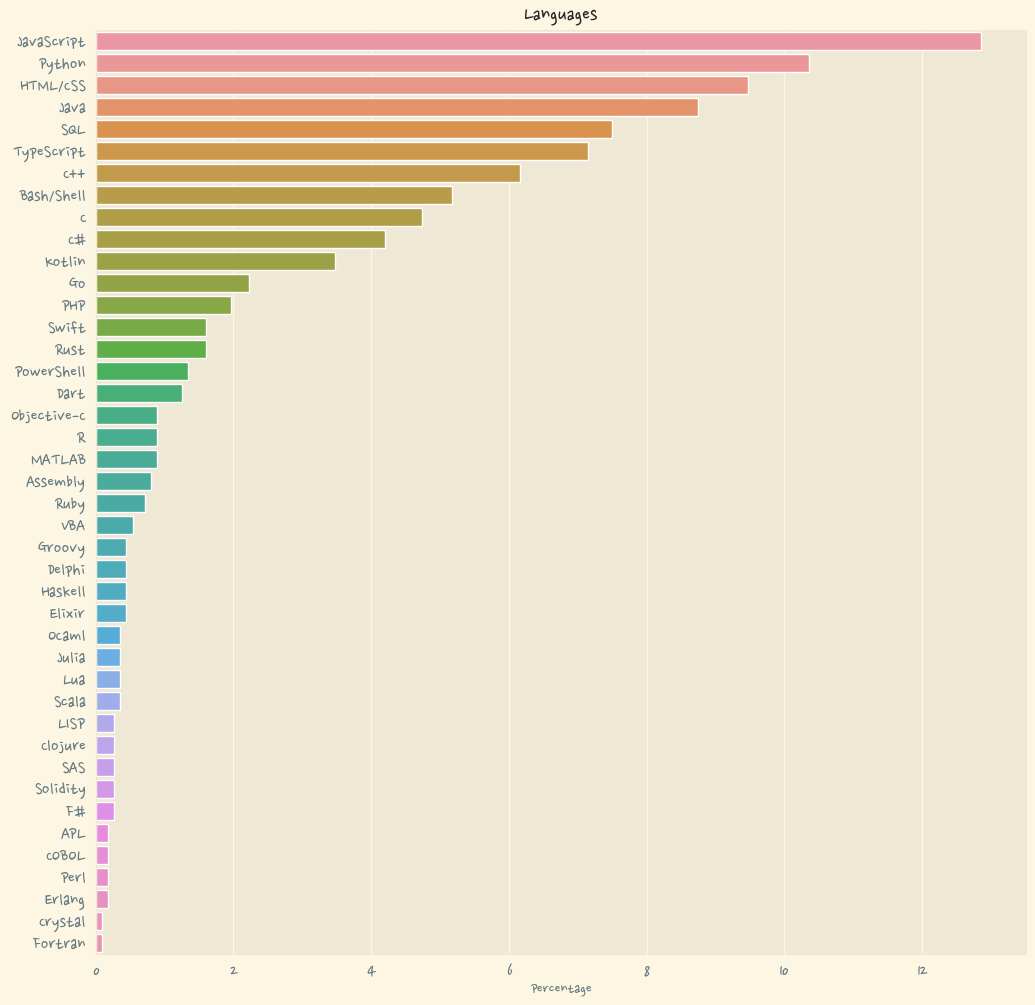

In [674]:
# titanic['category1'] = titanic.apply(lambda r : r['sex'] if r['age'] >=20 else 'child' ,axis =1)

survey_df['korea_lauguage'] = survey_df.apply(lambda r : r['LanguageHaveWorkedWith'] if r['Country'] == 'South Korea' else None, axis=1)
survey_df['korea_lauguage']


df_korea = split_multicolumn(survey_df['korea_lauguage'])
korea_totals = df_korea.sum().sort_values(ascending=False)
korea_percentage = (korea_totals/korea_totals.sum())*100

plt.figure(figsize=(12, 12))
plt.title('Languages')
sns.barplot(x = korea_percentage , y = korea_percentage.index )
plt.xlabel('Percentage')
plt.ylabel(None)
plt.show()

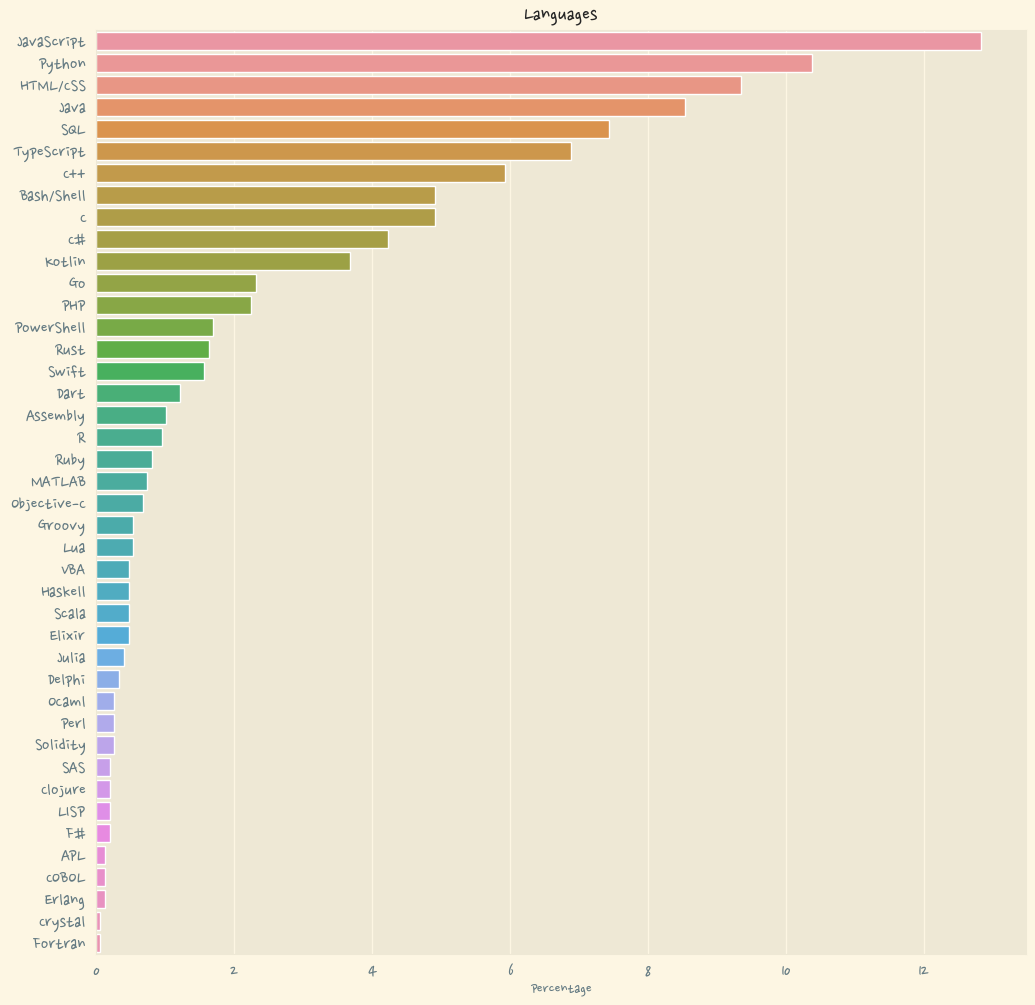

In [692]:
home_country = survey_df[(survey_df["Country"] == "South Korea") | (survey_df["Country"] == "Republic of Korea")]
home_country

df_korea = split_multicolumn(home_country['LanguageHaveWorkedWith'])
korea_totals = df_korea.sum().sort_values(ascending=False)
korea_percentage = (korea_totals/korea_totals.sum())*100

plt.figure(figsize=(12, 12))
plt.title('Languages')
sns.barplot(x = korea_percentage , y = korea_percentage.index )
plt.xlabel('Percentage')
plt.ylabel(None)
plt.show()

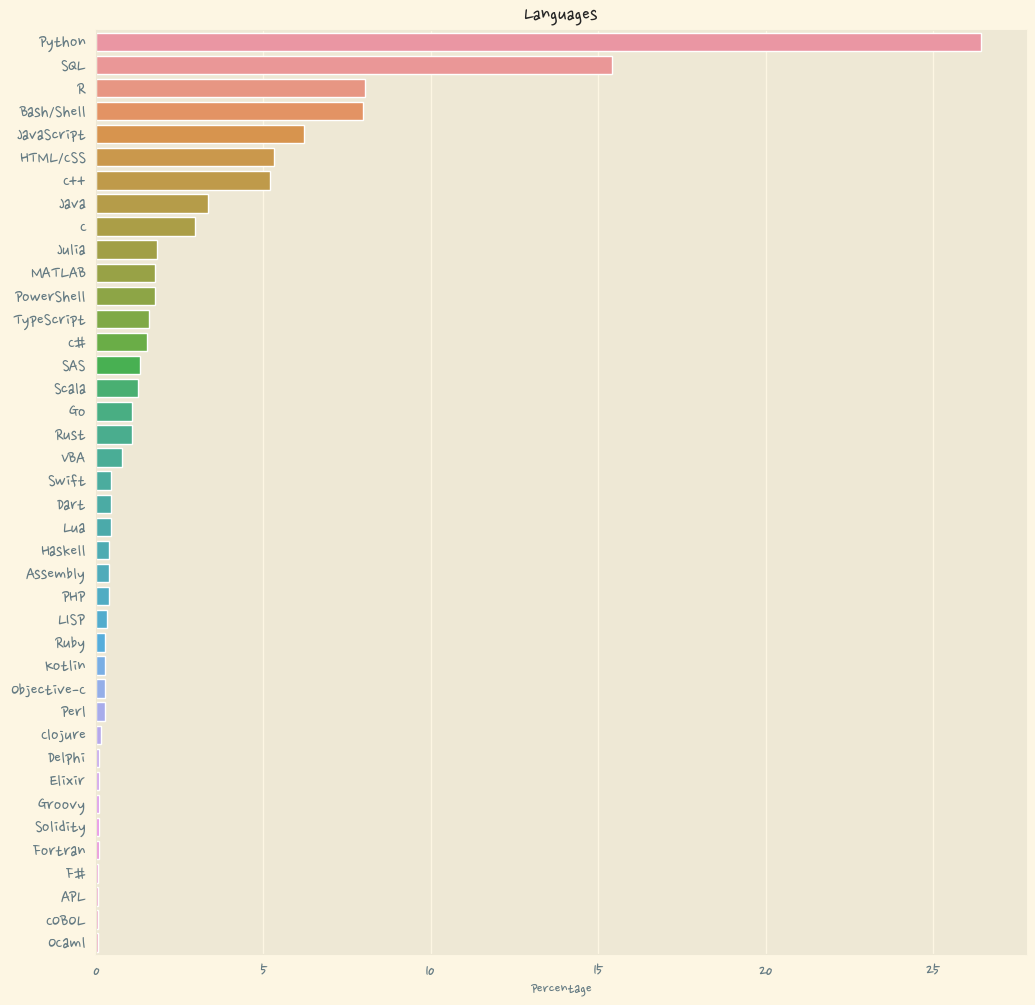

In [691]:
DevType_mach = survey_df[survey_df.DevType == 'Data scientist or machine learning specialist']
DevType_mach

df_DevType_mach = split_multicolumn(DevType_mach['LanguageHaveWorkedWith'])
DevType_mach_totals = df_DevType_mach.sum().sort_values(ascending=False)
DevType_mach_percentage = (DevType_mach_totals/DevT ype_mach_totals.sum())*100

plt.figure(figsize=(12, 12))
plt.title('Languages')
sns.barplot(x = DevType_mach_percentage , y = DevType_mach_percentage.index)
plt.xlabel('Percentage')
plt.ylabel(None)
plt.show()

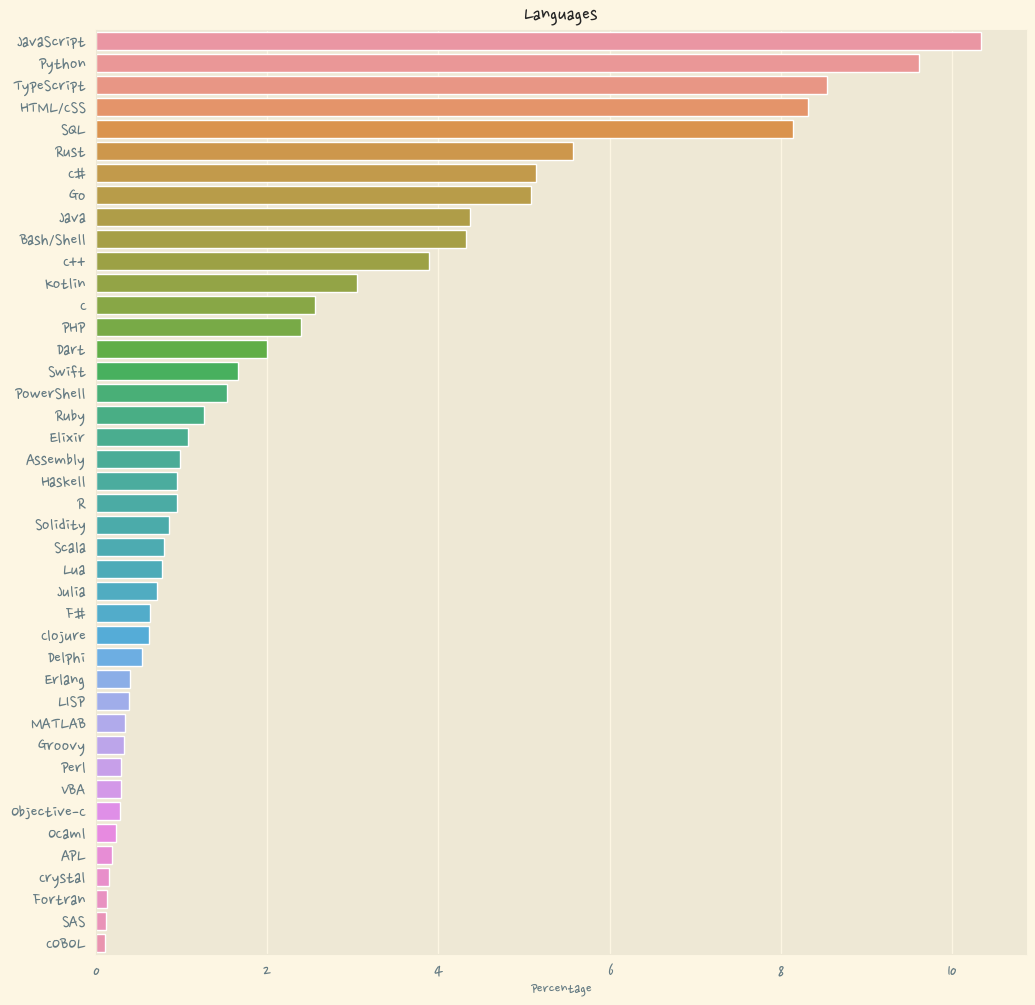

In [706]:
df_want_language = split_multicolumn(survey_df.LanguageWantToWorkWith)
df_want_language_total = df_want_language.sum().sort_values(ascending=False)
df_want_language_percentage = (df_want_language_total / df_want_language_total.sum())*100

plt.figure(figsize=(12, 12))
plt.title('Languages')
sns.barplot(x = df_want_language_percentage , y = df_want_language_percentage.index)
plt.xlabel('Percentage')
plt.ylabel(None)
plt.show()

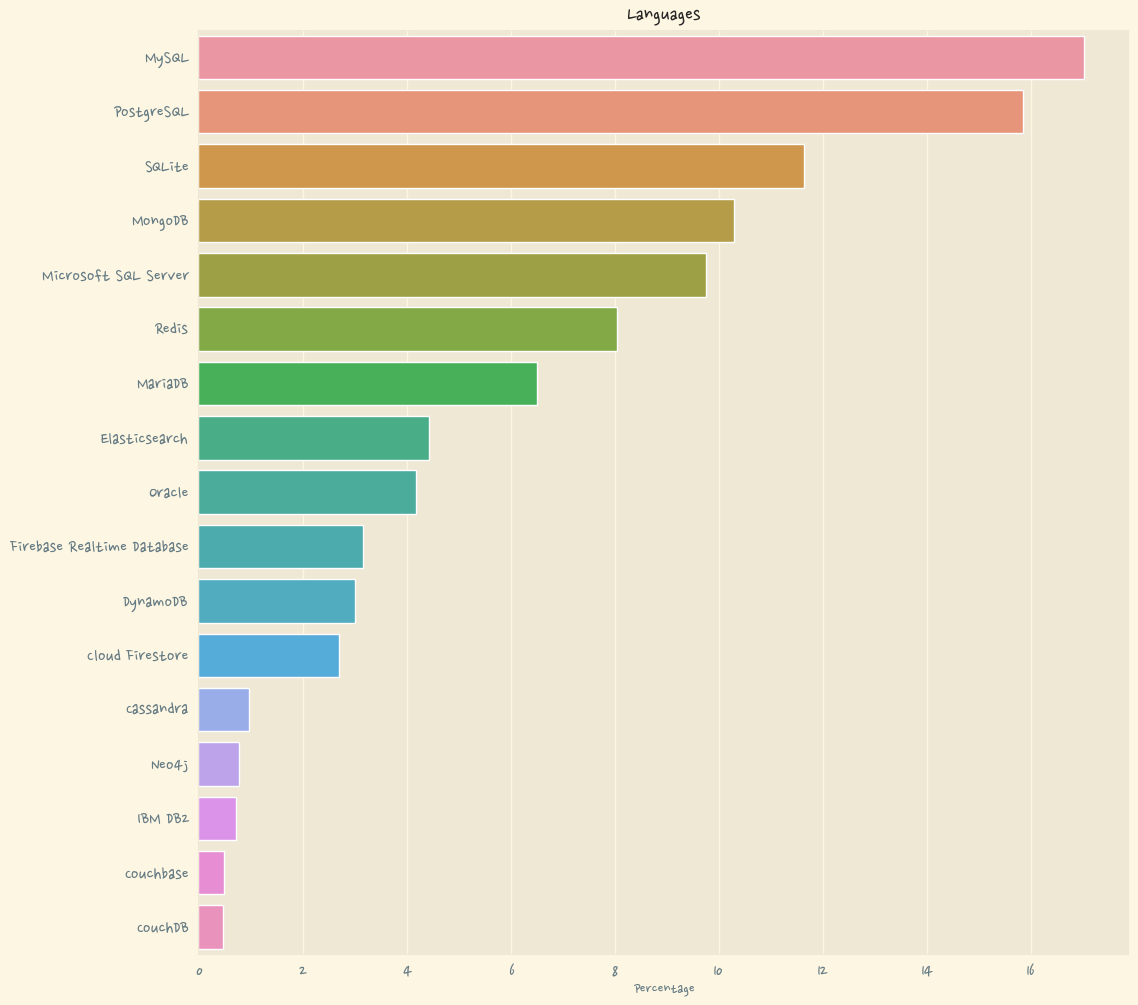

In [711]:
df_data_language = split_multicolumn(survey_raw_df.DatabaseHaveWorkedWith)
df_data_language_total = df_data_language.sum().sort_values(ascending=False)
df_data_language_percentage = (df_data_language_total / df_data_language_total.sum())*100

plt.figure(figsize=(12, 12))
plt.title('Languages')
sns.barplot(x = df_data_language_percentage , y = df_data_language_percentage.index)
plt.xlabel('Percentage')
plt.ylabel(None)
plt.show()
